# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [1]:
# Loading all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Load data

In [2]:
# Load the data file into a DataFrame
df= pd.read_csv('/datasets/vehicles_us.csv')

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

In [3]:
# print the general/summary information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
df.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
7095,26990,2017.0,chevrolet colorado,excellent,6.0,gas,20107.0,automatic,truck,NaN,NaN,2018-07-24,5
35362,14785,2011.0,ram 2500,excellent,8.0,gas,136821.0,automatic,pickup,silver,1.0,2018-05-16,10
29479,4995,2006.0,ford fusion,excellent,6.0,gas,116000.0,automatic,sedan,grey,NaN,2019-04-08,63
28011,7999,2002.0,toyota tundra,good,8.0,gas,220.0,automatic,pickup,grey,1.0,2019-03-27,25
35997,7777,2005.0,gmc sierra 1500,good,8.0,gas,NaN,automatic,truck,grey,1.0,2018-07-19,16


There are 51525 entries, some columns have missing values, some have unclear names and others have inappropriate data types. we will have to deal with all of them and fix them accordingly. 

In [5]:
df_to_replace = df[['model_year','cylinders','odometer', 'is_4wd', 'date_posted']]
df_to_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model_year   47906 non-null  float64
 1   cylinders    46265 non-null  float64
 2   odometer     43633 non-null  float64
 3   is_4wd       25572 non-null  float64
 4   date_posted  51525 non-null  object 
dtypes: float64(4), object(1)
memory usage: 2.0+ MB


The columns with inappropriate data types are the stated above.
*model_year, cylinders, and odometer* should be integers, as they all recieve absolute values.
*is4wd* should be a boolean type.
*date_posted* should be a datetime type.

In [6]:
df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

There are missing values across some columns. most of the missing values columns are those with inappropriate data types. The column that significantly contain the most missing values is the *is_4wd* column. We could try and change the data types and that may fix the problem.

### Conclusions and further steps

As we can see in the initial data there are many problems to fix. most of the data looks quite normal, but half of the entries have no *is4wd* value, which is strange.

Next, I'm going to clean the data: look for duplicates, fill in missing values (or drop them if not critical to the analysis), change data types (model_year, cylinders, and odometer to integers, is4wd to boolean, and date_posted to datetime) and change column names (model to name, odometer to mileage, paint_color to color)

In [9]:
df.duplicated().sum()

0

## Treat missing values (if any)

In [10]:
print(df['model_year'].isna().sum() / df.shape[0])
print(df['cylinders'].isna().sum() / df.shape[0])
print(df['odometer'].isna().sum() / df.shape[0])
print(df['paint_color'].isna().sum() / df.shape[0])
print(df['is_4wd'].isna().sum() / df.shape[0])

0.07023774866569626
0.10208636584182436
0.15316836487142163
0.17985443959243086
0.5036972343522562


In [11]:
df[df.isna().any(axis=1)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


As missing values proportions for the 5 above columns are higher than 1% of the data, we can not drop them, as it would distort the analysis. I am going to fill them as followed:
- *paint_color* would be unknown as it is categorical.
- *model year*, *cylinders* with their respective modes
- *odometer* would be the median of each model year with missing value
- *is_4wd* is yet to be discovered.

In [12]:
df[['model_year', 'model', 'cylinders','odometer','paint_color', 'is_4wd']]

,model_year,model,cylinders,odometer,paint_color,is_4wd
0,2011.0,bmw x5,6.0,145000.0,NaN,1.0
1,NaN,ford f-150,6.0,88705.0,white,1.0
2,2013.0,hyundai sonata,4.0,110000.0,red,NaN
3,2003.0,ford f-150,8.0,NaN,NaN,NaN
4,2017.0,chrysler 200,4.0,80903.0,black,NaN
...,...,...,...,...,...,...
51520,2013.0,nissan maxima,6.0,88136.0,black,NaN
51521,2002.0,honda civic,4.0,181500.0,white,NaN
51522,2009.0,hyundai sonata,4.0,128000.0,blue,NaN
51523,2013.0,toyota corolla,4.0,139573.0,black,NaN


### is_4wd
50% of the data is missing so we need to take that into account when filling the missing values and back up our decision with statistical evidence

In [13]:
df['is_4wd'].unique()

array([ 1., nan])

In [14]:
def unique_values_by_is_4wd(col):
    print("unique values for ", col, " when is_4wd is True: ", df.loc[df['is_4wd'] == True, col].unique())
    print("unique values for ", col, " when is_4wd is NaN: ", df.loc[df['is_4wd'].isna(), col].unique())
    print('\n\n')

In [15]:
column_with_potential_influence_on_is_4wd = ['cylinders', 'type', 'transmission', 'fuel']

In [16]:
[unique_values_by_is_4wd(col) for col in column_with_potential_influence_on_is_4wd]

unique values for  cylinders  when is_4wd is True:  [ 6.  4. nan  8.  5. 10.  3. 12.]
unique values for  cylinders  when is_4wd is NaN:  [ 4.  8.  6. nan  5. 10.  3.]



unique values for  type  when is_4wd is True:  ['SUV' 'pickup' 'sedan' 'truck' 'hatchback' 'wagon' 'other' 'offroad'
 'convertible' 'mini-van' 'coupe' 'van']
unique values for  type  when is_4wd is NaN:  ['sedan' 'pickup' 'SUV' 'coupe' 'van' 'truck' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'bus' 'offroad']



unique values for  transmission  when is_4wd is True:  ['automatic' 'other' 'manual']
unique values for  transmission  when is_4wd is NaN:  ['automatic' 'manual' 'other']



unique values for  fuel  when is_4wd is True:  ['gas' 'diesel' 'other' 'hybrid' 'electric']
unique values for  fuel  when is_4wd is NaN:  ['gas' 'diesel' 'hybrid' 'other' 'electric']





[None, None, None, None]

It seems like there is no specific attribute that has an influence on the truth value of is_4wd since values for all of these attributes are equally distributed, for both True and NaN. Let's look at Odometer

In [17]:
df['is_4wd'] = df['is_4wd'].fillna(0)

In [18]:
df['paint_color'] = df['paint_color'].fillna(value='unknown')

In [19]:
df['model_year'] = df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

In [22]:
df['odometer'] = df.groupby(['condition', 'model_year'])['odometer'].transform(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [23]:
df[df['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
21421,4500,1974.0,chevrolet corvette,fair,8.0,gas,NaN,automatic,sedan,red,0.0,2018-12-15,18
28009,65000,1960.0,chevrolet corvette,like new,8.0,gas,NaN,manual,coupe,unknown,0.0,2018-11-03,41
31806,1700,1996.0,ford mustang,salvage,6.0,gas,NaN,manual,convertible,white,0.0,2019-03-31,46
33257,4500,1963.0,chevrolet impala,fair,NaN,gas,NaN,automatic,sedan,unknown,0.0,2019-03-17,38
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,SUV,white,0.0,2018-06-24,25
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59
46911,22300,2003.0,chevrolet corvette,new,8.0,gas,NaN,manual,convertible,black,0.0,2018-11-08,23


In [24]:
df = df.dropna(subset=['odometer'])

In [25]:
df['cylinders'] = df.groupby(['model', 'model_year'])['cylinders'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [27]:
df[df['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1101,9200,1975.0,ford f-150,excellent,NaN,gas,18000.0,automatic,truck,green,0.0,2018-08-28,40
3139,3900,2003.0,ford f-350 sd,good,NaN,gas,170000.0,automatic,truck,black,1.0,2018-06-20,59
3844,1900,1986.0,nissan sentra,excellent,NaN,gas,72419.0,manual,coupe,blue,0.0,2018-10-29,63
3914,9750,2007.0,chevrolet silverado 1500 crew,excellent,NaN,gas,133000.0,automatic,pickup,grey,0.0,2018-08-22,55
5870,2500,2003.0,ford f150 supercrew cab xlt,good,NaN,gas,169000.0,automatic,truck,green,1.0,2019-01-17,18
6932,4000,1993.0,ford f150,excellent,NaN,gas,157000.0,automatic,truck,unknown,1.0,2019-01-28,18
6982,3900,1977.0,chevrolet suburban,fair,NaN,gas,136250.0,automatic,SUV,custom,0.0,2019-02-02,71
7113,84900,2019.0,ford f350,new,NaN,diesel,9000.0,automatic,pickup,white,1.0,2019-03-26,7
7121,6900,2009.0,jeep cherokee,excellent,NaN,gas,130023.0,automatic,SUV,black,1.0,2018-09-03,19
11087,16000,1971.0,chevrolet camaro,excellent,NaN,gas,84107.0,manual,coupe,brown,0.0,2018-12-28,125


In [28]:
df = df.dropna(subset=['cylinders'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51492 non-null  int64  
 1   model_year    51492 non-null  float64
 2   model         51492 non-null  object 
 3   condition     51492 non-null  object 
 4   cylinders     51492 non-null  float64
 5   fuel          51492 non-null  object 
 6   odometer      51492 non-null  float64
 7   transmission  51492 non-null  object 
 8   type          51492 non-null  object 
 9   paint_color   51492 non-null  object 
 10  is_4wd        51492 non-null  float64
 11  date_posted   51492 non-null  object 
 12  days_listed   51492 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


## Fix data types

In [30]:
df['is_4wd'] = df.is_4wd.astype('bool')
df['model_year'] = df.model_year.astype('int64')
df['cylinders'] = df.cylinders.astype('int64')
df['paint_color'] = df.paint_color.astype('category')
df['odometer'] = df.odometer.astype('int64')
df['date_posted']= pd.to_datetime(df['date_posted'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51492 non-null  int64         
 1   model_year    51492 non-null  int64         
 2   model         51492 non-null  object        
 3   condition     51492 non-null  object        
 4   cylinders     51492 non-null  int64         
 5   fuel          51492 non-null  object        
 6   odometer      51492 non-null  int64         
 7   transmission  51492 non-null  object        
 8   type          51492 non-null  object        
 9   paint_color   51492 non-null  category      
 10  is_4wd        51492 non-null  bool          
 11  date_posted   51492 non-null  datetime64[ns]
 12  days_listed   51492 non-null  int64         
dtypes: bool(1), category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 4.8+ MB


In [31]:
df.rename(columns={'model': 'name', 'odometer': 'mileage', 'paint_color': 'color'}, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51492 non-null  int64         
 1   model_year    51492 non-null  int64         
 2   name          51492 non-null  object        
 3   condition     51492 non-null  object        
 4   cylinders     51492 non-null  int64         
 5   fuel          51492 non-null  object        
 6   mileage       51492 non-null  int64         
 7   transmission  51492 non-null  object        
 8   type          51492 non-null  object        
 9   color         51492 non-null  category      
 10  is_4wd        51492 non-null  bool          
 11  date_posted   51492 non-null  datetime64[ns]
 12  days_listed   51492 non-null  int64         
dtypes: bool(1), category(1), datetime64[ns](1), int64(5), object(5)
memory usage: 4.8+ MB


## Enrich data

Adding additional factors to the data to make the analysis easier.

In [33]:
# Add datetime values for when the ad was placed
df['day_posted'] = df['date_posted'].dt.day_name()
df['month_posted'] = df['date_posted'].dt.month
df['year_posted'] = df['date_posted'].dt.year

In [34]:
# Add the vehicle's age when the ad was placed

df['car_age'] = df['year_posted'] - df['model_year']

In [35]:
df['car_age'].sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  63,  71,  82, 110])

In [36]:
# Add the vehicle's average mileage per year

def avg_yearly_mileage(df):
    if df['car_age'] == 0:
        return df['mileage']
    else:
        return df['mileage'] / df['car_age']
    
df['avg_yearly_mileage'] = df.apply(avg_yearly_mileage, axis = 1)
df['avg_yearly_mileage'] = df['avg_yearly_mileage'].astype('int64')

In [37]:
# It might help to replace the condition values with something that can be manipulated more easily

df = df.replace({'condition':{'new':5, 'like new':4, 'excellent':3, 'good':2 , 'fair':1 ,'salvage':0}})

## Check clean data

In [38]:
# print the general/summary information about the DataFrame

df.describe()

,price,model_year,condition,cylinders,mileage,days_listed,month_posted,year_posted,car_age,avg_yearly_mileage
count,51492.000000,51492.000000,51492.000000,51492.000000,51492.000000,51492.000000,51492.000000,51492.000000,51492.00000,51492.000000
mean,12131.759710,2009.810786,2.637594,6.120485,115234.522295,39.553445,6.628544,2018.307426,8.49664,17736.223802
std,10032.369324,6.033916,0.712042,1.657775,62189.997840,28.201542,3.474000,0.461432,6.04751,12447.727261
min,1.000000,1908.000000,0.000000,3.000000,0.000000,0.000000,1.000000,2018.000000,0.00000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,73179.000000,19.000000,3.000000,2018.000000,4.00000,10916.000000
50%,9000.000000,2011.000000,3.000000,6.000000,114778.500000,33.000000,7.000000,2018.000000,7.00000,15220.000000
75%,16847.000000,2014.000000,3.000000,8.000000,151713.250000,53.000000,10.000000,2019.000000,12.00000,21285.000000
max,375000.000000,2019.000000,5.000000,12.000000,990000.000000,271.000000,12.000000,2019.000000,110.00000,373200.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51492 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51492 non-null  int64         
 1   model_year          51492 non-null  int64         
 2   name                51492 non-null  object        
 3   condition           51492 non-null  int64         
 4   cylinders           51492 non-null  int64         
 5   fuel                51492 non-null  object        
 6   mileage             51492 non-null  int64         
 7   transmission        51492 non-null  object        
 8   type                51492 non-null  object        
 9   color               51492 non-null  category      
 10  is_4wd              51492 non-null  bool          
 11  date_posted         51492 non-null  datetime64[ns]
 12  days_listed         51492 non-null  int64         
 13  day_posted          51492 non-null  object    

In [40]:
# print a sample of data
df.head()

,price,model_year,name,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,6,2018,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9,Friday,3,2019,16,12115
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,2,40451


## Study core parameters

We're going to study the parameters listed below through histograms.

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [41]:
# histogram creation function
def create_hist(column):
    return column.plot(kind='hist', bins=100) and column.describe()

count     51492.000000
mean      12131.759710
std       10032.369324
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16847.000000
max      375000.000000
Name: price, dtype: float64

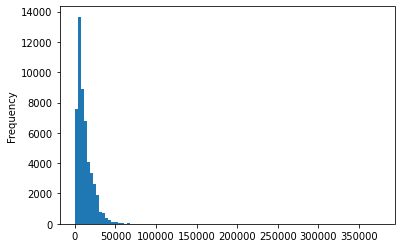

In [42]:
# price histogram
create_hist(df['price'])

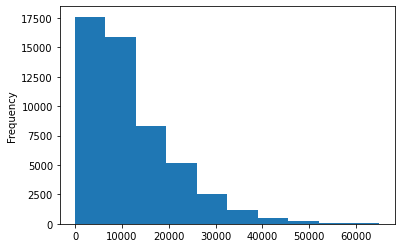

In [43]:
df['price'].plot(kind='hist', range=(0,65000));

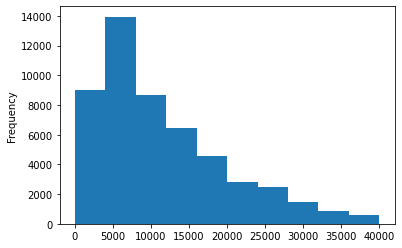

In [44]:
df['price'].plot(kind='hist', range=(0,40000));

count    51492.00000
mean         8.49664
std          6.04751
min          0.00000
25%          4.00000
50%          7.00000
75%         12.00000
max        110.00000
Name: car_age, dtype: float64

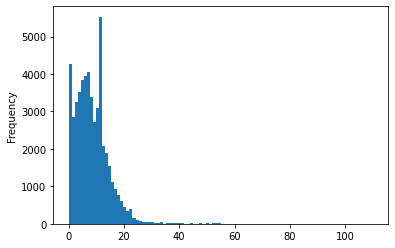

In [45]:
# car_age histogram
create_hist(df['car_age'])

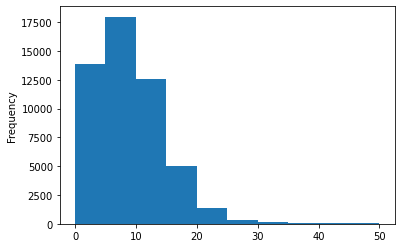

In [46]:
df['car_age'].plot(kind='hist', range=(0,50));

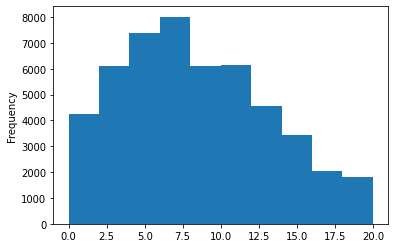

In [47]:
df['car_age'].plot(kind='hist', range=(0,20));

count     51492.000000
mean     115234.522295
std       62189.997840
min           0.000000
25%       73179.000000
50%      114778.500000
75%      151713.250000
max      990000.000000
Name: mileage, dtype: float64

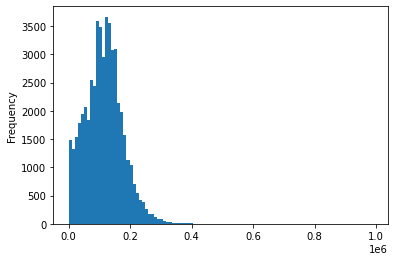

In [48]:
# mileage histogram
create_hist(df['mileage'])

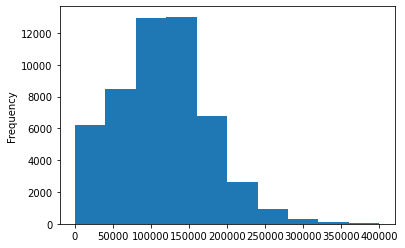

In [49]:
df['mileage'].plot(kind='hist', range=(0,400000));

count    51492.000000
mean         6.120485
std          1.657775
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

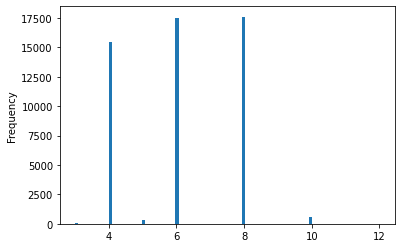

In [50]:
# number of cylinders histogram
create_hist(df['cylinders'])

count    51492.000000
mean         2.637594
std          0.712042
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

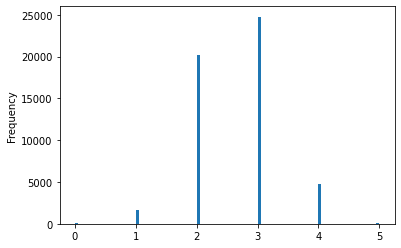

In [51]:
# car condition histogram
create_hist(df['condition'])

## Study and treat outliers

From the histograms above, we can detect the outliers: 
- prices higher than 50,000
- car age higher than 30
- mileage higher than 350,000
- cylinder numbers other than 4,6,8,10
- conditions 0 and 5

The normal values are as below:
- mean price is around 12000
- median car age is 7
- both median and mean mileage are around 15000
- most cars have 4/6/8 cylinders
- most cars are in condition 3

In [52]:
df_potential_outliers = df[['price', 'car_age', 'mileage', 'cylinders', 'condition']].describe()
df_potential_outliers

,price,car_age,mileage,cylinders,condition
count,51492.000000,51492.00000,51492.000000,51492.000000,51492.000000
mean,12131.759710,8.49664,115234.522295,6.120485,2.637594
std,10032.369324,6.04751,62189.997840,1.657775,0.712042
min,1.000000,0.00000,0.000000,3.000000,0.000000
25%,5000.000000,4.00000,73179.000000,4.000000,2.000000
50%,9000.000000,7.00000,114778.500000,6.000000,3.000000
75%,16847.000000,12.00000,151713.250000,8.000000,3.000000
max,375000.000000,110.00000,990000.000000,12.000000,5.000000


In [53]:
# Determine the lower limits for outliers
price = df.groupby("name")["price"].describe()
price["lower_limits"] = price["25%"] - 1.5*(price["75%"] - price["25%"])

In [54]:
# Determine the upper limits for outliers
price["upper_limits"] = price["75%"] + 1.5*(price["75%"] - price["25%"])

In [55]:
print(df['cylinders'].value_counts())
print(df['condition'].value_counts())

8     17614
6     17497
4     15474
10      577
5       294
3        34
12        2
Name: cylinders, dtype: int64
3    24761
2    20135
4     4740
1     1602
5      140
0      114
Name: condition, dtype: int64


After validating the outliers, we are going to filter them

In [56]:
# Store data without outliers in a separate DataFrame

filtered_df = df.query('price <= 50000 and car_age <= 30 and mileage <= 350000 and '
                                'cylinders in (4, 6, 8, 10)')

In [57]:
filtered_df

,price,model_year,name,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,6,2018,7,20714
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,Friday,10,2018,7,12672
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,Thursday,2,2019,6,18333
3,1500,2003,ford f-150,1,8,gas,193850,automatic,pickup,unknown,False,2019-03-22,9,Friday,3,2019,16,12115
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,Tuesday,4,2019,2,40451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,False,2018-10-03,37,Wednesday,10,2018,5,17627
51521,2700,2002,honda civic,0,4,gas,181500,automatic,sedan,white,False,2018-11-14,22,Wednesday,11,2018,16,11343
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,False,2018-11-15,32,Thursday,11,2018,9,14222
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,False,2018-07-02,71,Monday,7,2018,5,27914


## Study core parameters without outliers

Using the filtered data to make new plots with comparison to the earlier ones (that included outliers)

In [59]:
def plot_filtered_and_original(col, range_interval):
    df[col].plot(kind='hist', bins=10, range=range_interval, label='original')
    filtered_df[col].plot(kind='hist', bins=10,range=range_interval, label='filtered')
    plt.legend();

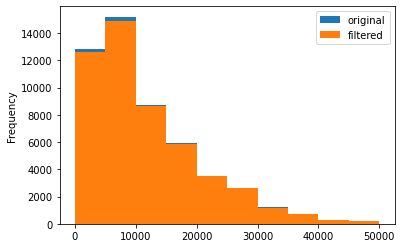

In [60]:
plot_filtered_and_original('price', (0,50000))

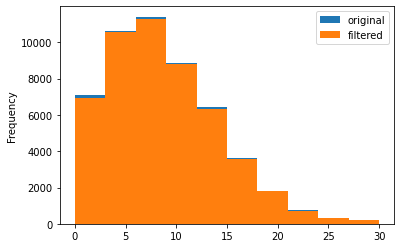

In [61]:
plot_filtered_and_original('car_age', (0,30))

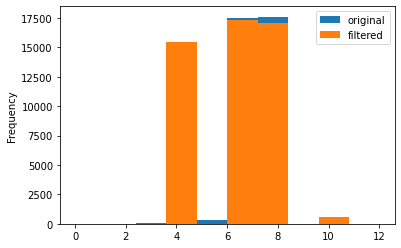

In [62]:
plot_filtered_and_original('cylinders', (0,12))

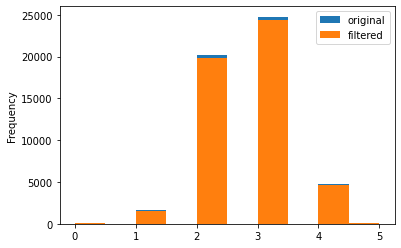

In [63]:
plot_filtered_and_original('condition', (0,5))

The graphs above show the difference in filtered data vs the original data, we can see that the outliers were removed.

## Ads lifetime
Advertisements were displayed for 50322 days. The median is 33 days (also the typical lifetime of an ad)

In [64]:
filtered_df['days_listed'].describe()

count    50514.000000
mean        39.549293
std         28.201818
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

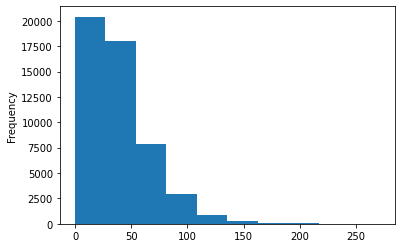

In [65]:
filtered_df['days_listed'].plot(kind='hist')
plt.show()

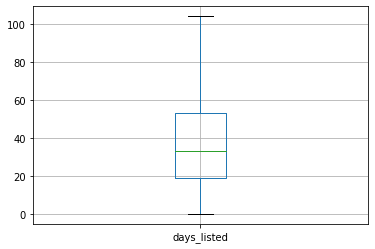

In [66]:
# sb.boxplot(data=filtered_df, y='days_listed', showfliers=False)

# or

filtered_df.boxplot(column='days_listed', showfliers=False)
plt.show()

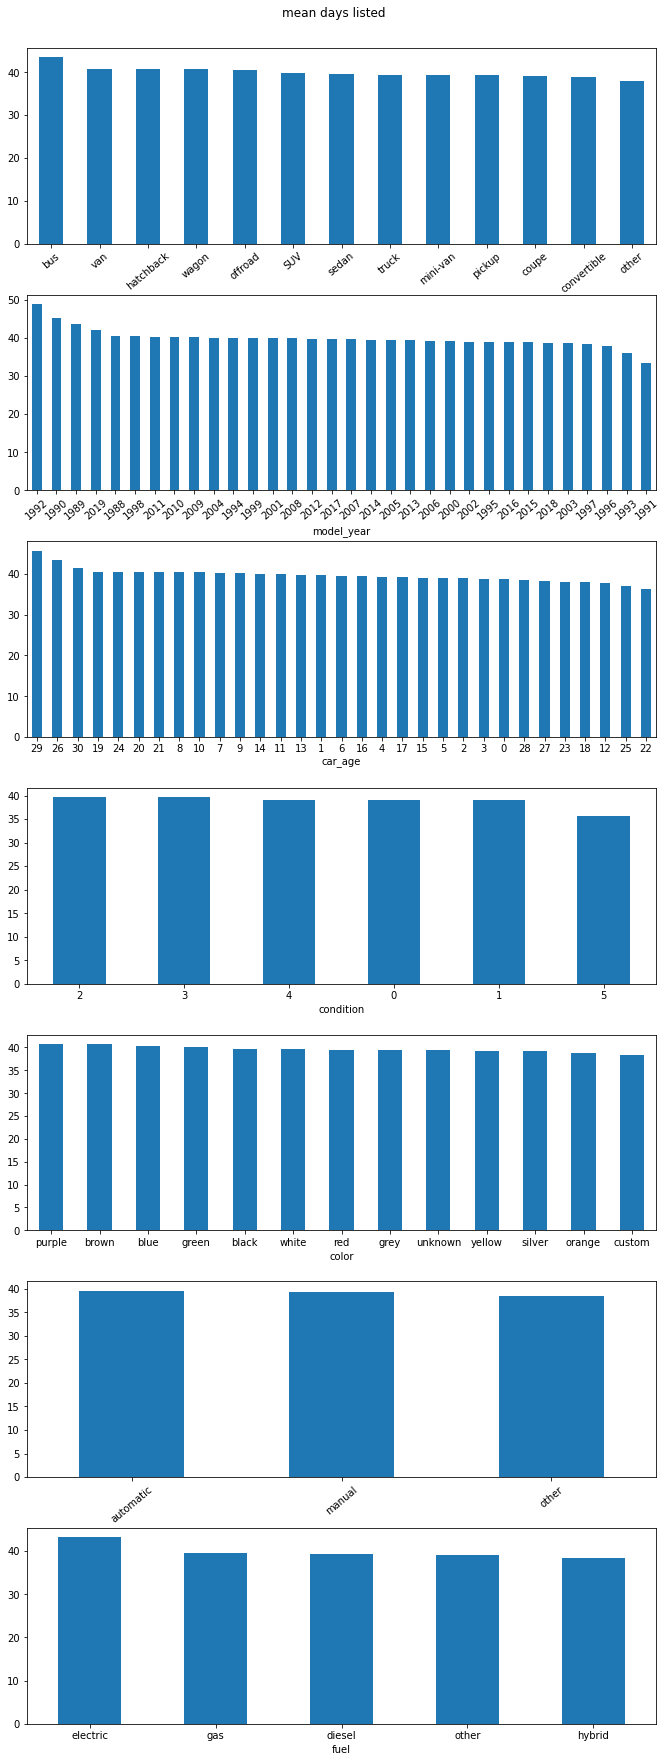

In [67]:
cols = ['type', 'model_year', 'car_age', 'condition', 'color', 'transmission', 'fuel']
rotations = [40, 40, 0, 0, 0, 40, 0]

fig, axes = plt.subplots(7, 1, figsize=(10, 25))
fig.suptitle('mean days listed')
fig.tight_layout(pad=3)
# axes[3,1].set_axis_off()

for i, col in enumerate(cols):
    filtered_df.groupby(col)['days_listed'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes.ravel()[i], rot=rotations[i])

After many comparisons above, it looks like most cars are sold on average after 40 days.
the only cars that are listed longer than that are old cars and car type 'bus'.
Let's look fruther.

In [68]:
filtered_df.query('type == "bus"').groupby('name')['days_listed'].mean()

name
ford econoline      45.470588
ford explorer       28.800000
ford f-250          53.000000
hyundai santa fe    74.000000
Name: days_listed, dtype: float64

In [69]:
filtered_df.query('days_listed <= 7').groupby('type')['mileage'].mean()

type
SUV            117207.611036
bus            225000.000000
convertible     87311.333333
coupe           74821.213740
hatchback      122737.428571
mini-van       127299.345679
offroad        116645.461538
other          107166.866667
pickup         120207.690418
sedan          107118.523810
truck          123372.321629
van            129140.489362
wagon          119465.525253
Name: mileage, dtype: float64

In [70]:
filtered_df.query('days_listed <= 1').groupby('type')['mileage'].mean()

type
SUV            102305.937500
convertible     73081.000000
coupe           54890.000000
hatchback      139854.750000
mini-van       113059.333333
offroad        116625.000000
pickup         121207.580645
sedan          107395.265306
truck          114379.019231
van            112822.285714
wagon          123008.000000
Name: mileage, dtype: float64

We can see that high mileage cars are sold rather quickly, and also luxurious cars as coupe and convertibles with lower mileage.

## Average price per each type of vehicle

SUV and truck are leading with ads count! both above 12k ads.
truck is the 2nd most expensive vehicle, preceded by bus. 

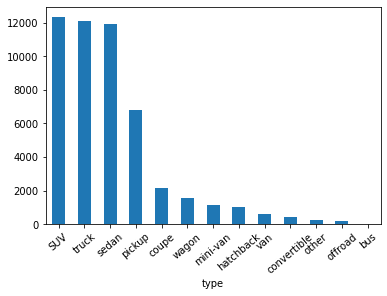

             ads_count
type                  
SUV              12327
bus                 24
convertible        396
coupe             2128
hatchback         1029
mini-van          1155
offroad            209
other              250
pickup            6821
sedan            11919
truck            12094
van                628
wagon             1534


In [71]:
ads_by_type = filtered_df.pivot_table(index='type', values='price', aggfunc='count')
ads_by_type.columns = ['ads_count']
ads_by_type['ads_count'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=40)
plt.show()
print(ads_by_type)

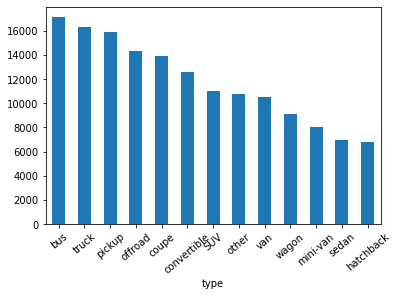

             price
type              
bus          17136
truck        16341
pickup       15870
offroad      14297
coupe        13941
convertible  12575
SUV          11025
other        10760
van          10489
wagon         9084
mini-van      8038
sedan         6970
hatchback     6805


In [72]:
mean_price_by_type = round(filtered_df.pivot_table(index='type', values='price', aggfunc='mean'), 0)
mean_price_by_type['price'].sort_values(ascending=False).plot.bar()
plt.xticks(rotation=40)
plt.show()
print(mean_price_by_type.sort_values(by='price', ascending=False).astype('int64'))

## Price factors

**SUV**

In [73]:
suv = filtered_df.query('type == "SUV"')
suv.head()

,price,model_year,name,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,Saturday,6,2018,7,20714
7,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,Monday,1,2019,6,18245
8,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,Monday,7,2018,6,17362
9,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,Friday,2,2019,11,13381
14,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,Thursday,1,2019,10,13228


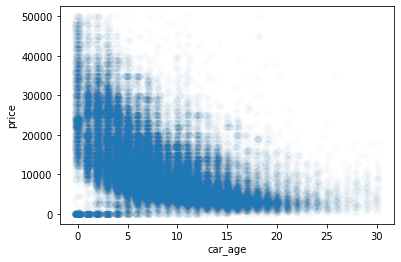

In [74]:
#car_age
sb.regplot(data=filtered_df, x='car_age', y='price', scatter_kws={'alpha':1/60}, fit_reg=False, x_jitter=0.3);
plt.show()

In [75]:
suv['car_age'].corr(suv['price'])

-0.5714175628149429

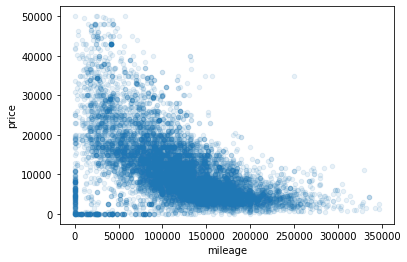

In [76]:
#mileage
suv.plot(x='mileage', y='price', kind='scatter', alpha=1/10)
plt.show()

In [77]:
suv['mileage'].corr(suv['price'])

-0.543332922184443

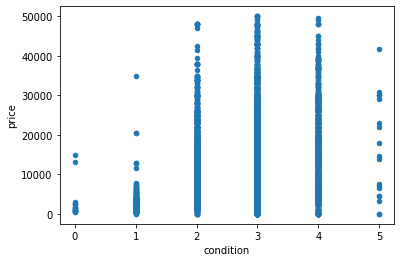

In [78]:
#condition
suv.plot(x='condition', y='price', kind='scatter')
plt.show()

In [80]:
suv['condition'].corr(suv['price'])

0.274699415386876

               name
transmission       
other           159
manual          500
automatic     11668


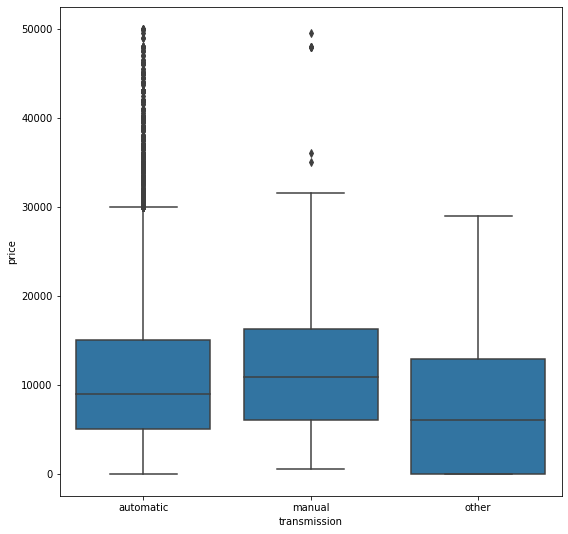

In [81]:
#transmission
print(suv.pivot_table(index = 'transmission', values = 'name', aggfunc = 'count').sort_values(by = 'name'))
plt.figure(figsize=(9,9))
sb.boxplot(data=suv, x='transmission', y='price', color=sb.color_palette()[0]);

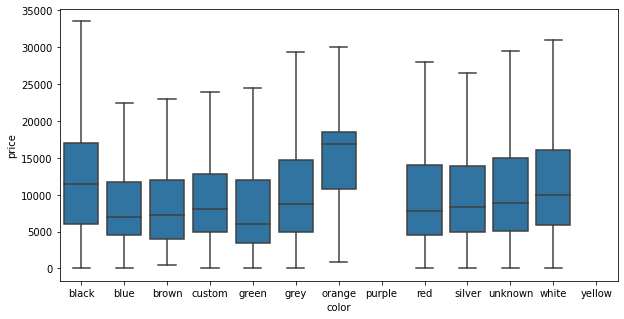

In [82]:
#color
suv.pivot_table(index = 'color', values = 'name', aggfunc = 'count').sort_values(by = 'name')
suv_ready = suv.query('color != "purple" and color != "yellow"')
suv_ready['color'].value_counts()

plt.figure(figsize=(10,5))
sb.boxplot(data=suv_ready, x='color', y='price', color=sb.color_palette()[0], showfliers=False);

              price   car_age   mileage  condition
price      1.000000 -0.571418 -0.543333   0.274699
car_age   -0.571418  1.000000  0.630177  -0.325170
mileage   -0.543333  0.630177  1.000000  -0.362868
condition  0.274699 -0.325170 -0.362868   1.000000


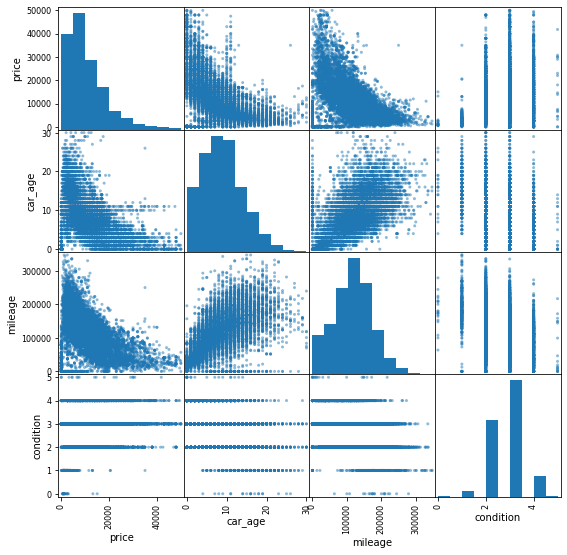

In [83]:
suv2 = suv[['price','car_age', 'mileage', 'condition']]
print(suv2.corr())
pd.plotting.scatter_matrix(suv2, figsize=(9, 9));

- car age x price - strong correlation - the older the car, the lower the price

- mileage x price - strong correlation - the higher the mileage, the lower the price

- condition x price - small correlation - this means the values are hardly related, which is surprising, because you would accept that the better the car's condition the higher the price, but as we've seen, other parameters are affecting the price.

- the most popular colour is black as it reaches the highest value of price, but the orange cars' 25% is close to the median of black colour, which means the orange is unique and people are willing to pay more for it.

- most of the vehicles are of automatic transmission.

**TRUCK**

In [84]:
truck = filtered_df.query('type == "truck"')
truck.head()

,price,model_year,name,condition,cylinders,fuel,mileage,transmission,type,color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,car_age,avg_yearly_mileage
22,7500,2004,chevrolet silverado,4,8,gas,180000,automatic,truck,red,True,2019-01-05,64,Saturday,1,2019,15,12000
39,8000,2009,ford f-150,2,8,gas,234000,automatic,truck,black,True,2019-03-31,1,Sunday,3,2019,10,23400
50,6200,2006,ford f-150,3,6,gas,69698,automatic,truck,custom,False,2018-05-03,50,Thursday,5,2018,12,5808
60,13000,2005,ram 1500,2,8,gas,146000,automatic,truck,grey,True,2019-03-14,26,Thursday,3,2019,14,10428
61,16999,2013,chevrolet silverado 1500,2,8,gas,137230,automatic,truck,white,True,2018-05-29,24,Tuesday,5,2018,5,27446


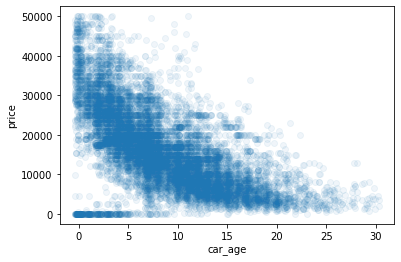

In [85]:
#car_age
# truck.plot(x='car_age', y='price', kind='scatter')
sb.regplot(data=truck, x='car_age', y='price', scatter_kws={'alpha':1/15}, fit_reg=False, x_jitter=0.4);
plt.show()

In [86]:
truck['car_age'].corr(truck['price'])

-0.6258166499344125

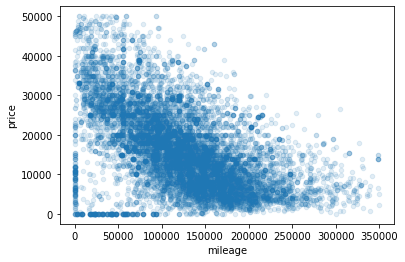

In [87]:
#mileage
truck.plot(x='mileage', y='price', kind='scatter', alpha=1/8)
plt.show()

In [88]:
truck['mileage'].corr(truck['price'])

-0.513288228445132

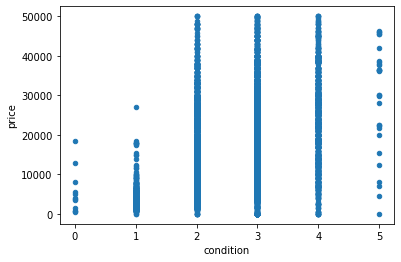

In [89]:
#condition
truck.plot(x='condition', y='price', kind='scatter')
plt.show()

In [90]:
truck['condition'].corr(truck['price'])

0.33161788030935097

               name
transmission       
other           205
manual          425
automatic     11464


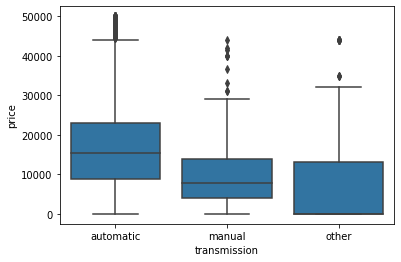

In [91]:
#transmission
print(truck.pivot_table(index = 'transmission', values = 'name', aggfunc = 'count').sort_values(by = 'name'))
sb.boxplot(data=truck, x='transmission', y='price', color=sb.color_palette()[0]);

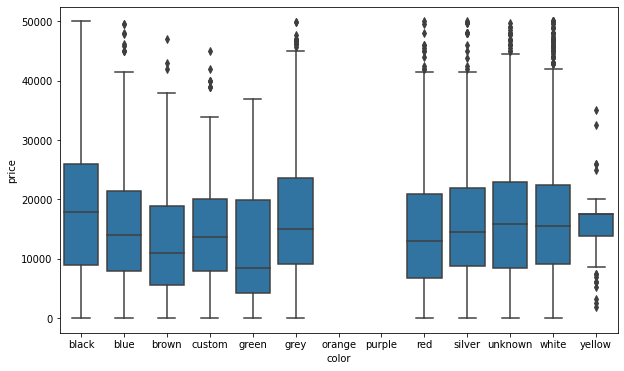

In [92]:
#color
truck.pivot_table(index = 'color', values = 'name', aggfunc = 'count', ).sort_values(by = 'name')
truck_ready = truck.query('color != "purple" and color != "orange"')
truck_ready['color'].value_counts()
plt.figure(figsize=(10,6))
sb.boxplot(data=truck_ready, x='color', y='price', color=sb.color_palette()[0]);

              price   car_age   mileage  condition
price      1.000000 -0.625817 -0.513288   0.331618
car_age   -0.625817  1.000000  0.573238  -0.342559
mileage   -0.513288  0.573238  1.000000  -0.335051
condition  0.331618 -0.342559 -0.335051   1.000000


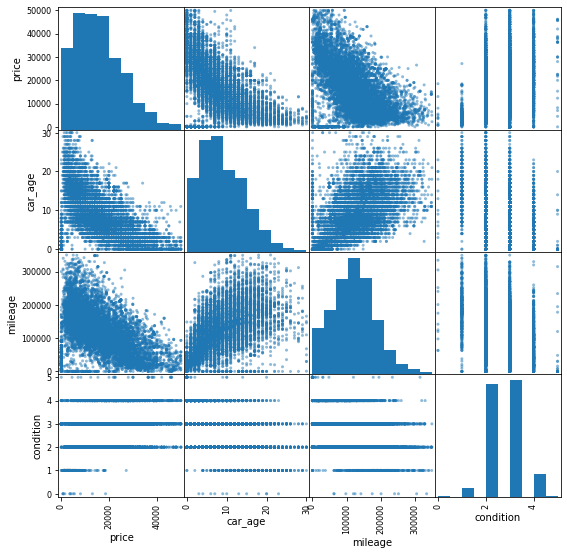

In [93]:
truck2 = truck[['price','car_age', 'mileage', 'condition']]
print(truck2.corr())
pd.plotting.scatter_matrix(truck2, figsize=(9, 9));

- car age x price - strong correlation - the older the car the lower the price
- mileage x price - strong correlation - the higher the mileage the lower the price
- condition x price - medium correlation -  this means condition slightly affects the price, but we would expect the correlation to be much higher as trucks are work vehicles which should be maintained even more than other vehicles.

- the most popular colours are black and grey.

- most of the vehicles are of automatic transmission.

*Vehicle Comparison:*
- both SUV's and trucks have a strong correlation for car age/price and mileage/price.
- SUV's have a small correlation for condition/price while trucks have it a little larger - we can assume that people may buy a suv regardless of its condition (of course not a salvage!)
- both vehicles are mostly of automatic transmission
- both vehicles are popular in black and grey but the suv's are also popular in orange.

## General conclusion

Dataset arrived with no duplicates as each row represents a vehicle offered for sale. it also arrived with missing values and inappropriate column names and data types.
after data preprocessing - filling in the missing values and changing the items stated above - the EDA begins.
investigating the data and looking at all possible connections and correlations lead us to the following conclusions about what sells a car:

- the newer the car, the higher the price.
- the lower its mileage, the higher the price.
- we would excpect that 'the better the condition, the higher the price', but our analysis does not show that, for this dataset.
- buses and trucks are the most expensive vehicles.
- SUV's and trucks are the most popular vehicles.
- black and grey are the popular colors for the selected vehicles.